In [1]:
from luna.dataset import LUNADataset
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from luna.utils import extract_patch
from luna.constants import INPUT_SIZE, PATCH_SIZE, PATCH_VOXEL_SPACING


In [2]:
ds = LUNADataset(Path("dataset"))

Loading training files: 100%|██████████| 526/526 [00:16<00:00, 31.91it/s]


In [3]:
for i in range(len(ds._metadata)):
    spacing = ds._metadata[i]["spacing"]
    if spacing[0] < 0.7: 
        print(i, ds._metadata[i]["spacing"])

81 [0.69999999 0.55078125 0.55078125]
84 [0.625   0.78125 0.78125]
85 [0.625   0.78125 0.78125]
90 [0.625    0.703125 0.703125]
91 [0.625    0.703125 0.703125]
97 [0.69999999 0.51953125 0.51953125]
103 [0.69999999 0.6875     0.6875    ]
113 [0.625      0.72265601 0.72265601]
117 [0.625    0.703125 0.703125]
118 [0.625    0.703125 0.703125]
119 [0.625    0.703125 0.703125]
123 [0.625      0.64453101 0.64453101]
124 [0.625      0.74218798 0.74218798]
125 [0.625      0.74218798 0.74218798]
126 [0.625      0.74218798 0.74218798]
137 [0.5        0.49609375 0.49609375]
141 [0.625      0.58593798 0.58593798]
146 [0.625      0.60546899 0.60546899]
147 [0.625      0.60546899 0.60546899]
154 [0.625      0.74218798 0.74218798]
155 [0.625      0.74218798 0.74218798]
156 [0.625      0.74218798 0.74218798]
157 [0.625      0.74218798 0.74218798]
158 [0.625    0.703125 0.703125]
159 [0.625    0.703125 0.703125]
161 [0.625 0.625 0.625]
162 [0.625    0.703125 0.703125]
163 [0.625    0.703125 0.703125]
1

float32


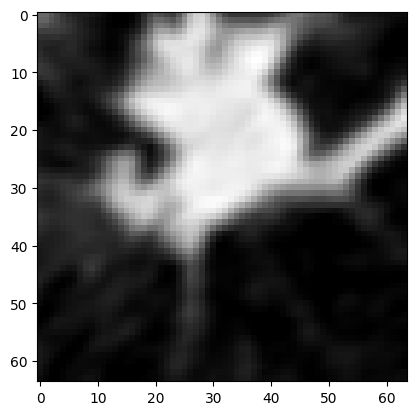

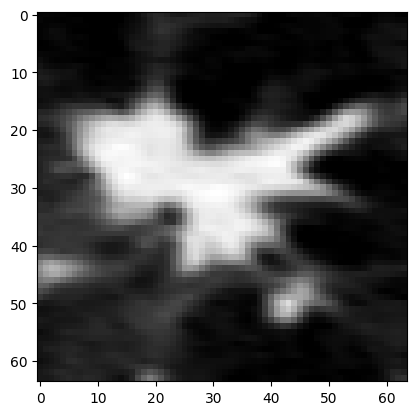

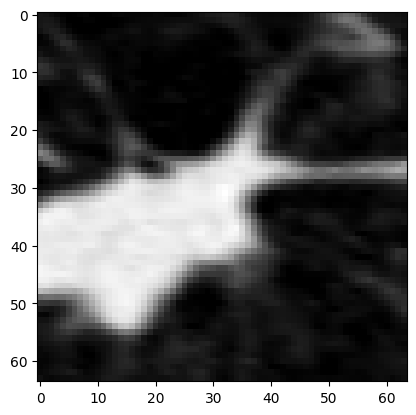

In [97]:

img = ds._raw_images[277]
# plt.imshow(img[:,64], cmap="gray")
# plt.show()
patch = extract_patch(
    raw_image=img,
    coord=tuple(np.array(INPUT_SIZE) // 2),
    srcWorldMatrix=ds._metadata[277]["transform"],
    srcVoxelSpacing=ds._metadata[277]["spacing"],
    output_shape=PATCH_SIZE,
    voxel_spacing=PATCH_VOXEL_SPACING,
    rotations=[(-20,20)] * 3,
    translations=5,
    scalings=[(0.8, 1.2)] * 3,
    mirrorings=(True, True, True),
)

print(patch.dtype)
patch = patch.astype(np.float32)
clip = LUNADataset.scale_intensity(patch)
# noise = LUNADataset.scale_intensity(patch + np.random.normal(0, 10, patch.shape))
# print(noise.dtype)
plt.imshow(clip[0][32], cmap="gray")
plt.show()
plt.imshow(clip[0][:,32], cmap="gray")
plt.show()
plt.imshow(clip[0][:,:,32], cmap="gray")
plt.show()
# plt.hist(patch[0][:,32].flatten(), bins=100)
# plt.imshow(noise[0][32], cmap="gray")
# plt.show()
